# Atividade: Perceptron para classificação de petroleo
**INSTITUTO FEDERAL DE MINAS GERIAS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala

**Aluno:** Euler Gomes


In [79]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go


### Funções de ativação

In [80]:
#funcoes de ativacao
#funcao degrau bipolar
def degrau_bipolar(x):
    if x > 0:
        y = 1
    else: # Trata x <= 0
        y = -1
    return y

#funcao de previsao
def previsao (w,x):
    u = np.dot(w.T,x)
    yhat = degrau_bipolar(u)
    return yhat

### Implementação do Perceptron

In [81]:
#leitura do dataset de treino
data = pd.read_csv('data/dataset_oil_training.csv', sep=';')
print(data.head())

   Amostra      x1      x2       x3    d
0        1 -0.6508  0.1097   4.0009 -1.0
1        2 -1.4492  0.8896   4.4005 -1.0
2        3  2.0850  0.6876   7.9845 -1.0
3        4  0.2626  1.1476  12.0710 -1.0
4        5  0.6418  1.0234   7.7985  1.0


In [82]:
#quatidade de elementos na amostra
n_amostras = data.shape[0]

#quantidade de variaveis de entrada (subtrair a coluna de tipos)
n_variaveis = 3

#separando os dados contendo apenas as variaveis de entrada
x = data.iloc[:, 1:4].values
print(x)

[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876  7.9845]
 [ 0.2626  1.1476 12.071 ]
 [ 0.6418  1.0234  7.7985]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [83]:
#inserindo o bias
bias = np.ones((n_amostras, 1)) * -1

#concatenar o bias com o dataset x
x = np.hstack((x, bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876  7.9845 -1.    ]
 [ 0.2626  1.1476 12.071  -1.    ]
 [ 0.6418  1.0234  7.7985 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [84]:
#associar cada entrada xi com cada saída y
y = data.iloc[:, 4].values
print(y)

#contar quantas amostras de cada classe existem no dataset
print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

[-1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
-1: 16
1: 14


## Inicialização do perceptron

In [85]:
#inicializar o vetor de pesos W com valores aleatorios
w = np.random.uniform(-1,1, n_variaveis + 1)
print(w)

[0.15620389 0.24779739 0.74725668 0.68920821]


In [86]:
#taxa de aprendizagem
eta = 0.7

#tolerancia
tolerancia = 0.01

#erro inicial
erro_medio = tolerancia + 1

#vetor de erro medio por epoca
erros_epocas = []

#contador de epocas
epoca = 0

#maximo de epocas para treino
max_epocas = 2000

In [87]:
#criterios de parada
criterio_erro = True
criterio_epocas = True

while criterio_erro == True and criterio_epocas == True:
    erro_atual = 0
    epoca = epoca + 1

    #embaralhar os indices
    ind_embaralhados = np.random.permutation(n_amostras)

    for i in range(n_amostras):
        indice_amostra = ind_embaralhados[i]
        xi_amostra = x[indice_amostra, :]

        #potencial e ativacao
        u = np.dot(w.T, xi_amostra)

        yhat = degrau_bipolar(u)

        e = y[indice_amostra] - yhat

        w = w + (eta * e) * xi_amostra

        erro_atual = erro_atual + np.abs(e)

    erro_medio = erro_atual / n_amostras
    erros_epocas.append(erro_medio)

    if erro_medio < tolerancia:
            criterio_erro = False
    if epoca > max_epocas:
            criterio_epocas = False


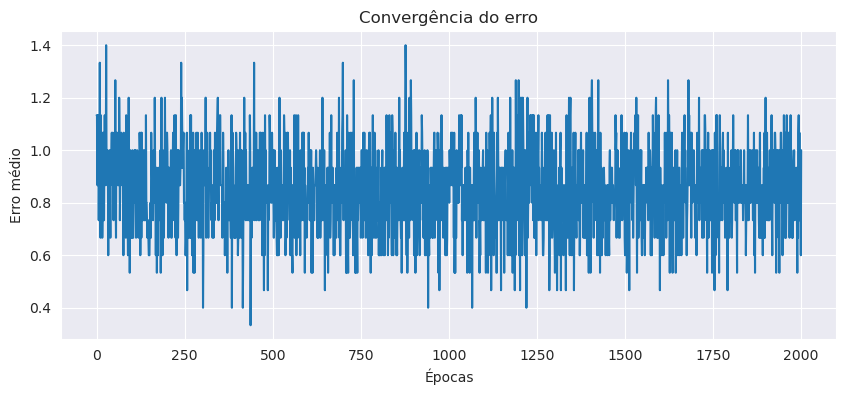

In [88]:
plt.figure(figsize = (10,4))
plt.plot(erros_epocas)
plt.title('Convergência do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro médio')
plt.grid(True)
plt.show()

In [89]:
print('Conjunto ideal de pesos w*')
print(w)

print('Quantidade de épocas necessárias')
print(epoca)

yhat_display = np.where(yhat == -1, 0, yhat)
y_display = np.where(y == -1, 0, y)

acuracia = (np.sum(yhat_display == y_display) / n_amostras) * 100
print(acuracia)

Conjunto ideal de pesos w*
[ 24.09606389  62.28165739  -8.43436332 -53.91079179]
Quantidade de épocas necessárias
2001
46.666666666666664


| Treino |          Pesos iniciais - W0 W1 W2 W3          |            Pesos finais - W0 W1 W2 W3            |
|--------|:----------------------------------------------:|:------------------------------------------------:|
| 1      |  0.59299181 0.34039827 0.54534365 0.51558908   | 3.97607181  8.25801827 -3.40003635 -6.684410923  |
| 2      |  -0.9415994   0.15183702  0.73735886 -0.93399  |   2.6718206   8.64543702 -3.23728114 -6.93399    |
| 3      | 0.89861555 -0.81599297  0.68705831 -0.64087316 |  4.61411555  9.00170703 -0.73244169 -7.24087316  |
| 4      | 0.85012439 -0.65550559  0.73160074  0.23060695 |  2.14502439  8.38047441 -2.43137926 -6.16939305  |
| 5      | 0.77303616  0.70334684 -0.394745   -0.57397204 |  3.17121616  8.86150684 -3.259425   -5.97397204  |

In [90]:
data_test = pd.read_csv('data/dataset_oil_test.csv', sep=';')

n_variaveis_test = 3

n_amostras_test = data_test.shape[0]

x_test = data.iloc[:, 1:4].values
print(x)

x_test = np.hstack((x_test, bias))
print(x_test)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876  7.9845 -1.    ]
 [ 0.2626  1.1476 12.071  -1.    ]
 [ 0.6418  1.0234  7.7985 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [91]:
y_previsto_test = np.zeros(n_amostras_test)
for i in range(n_amostras_test):
    y_previsto_test[i] = previsao(w, x_test[i])

    amostra_id = data_test.iloc[i, 0]

    print(f"Amostra {amostra_id}, Valor Previsto = {y_previsto_test[i]}")

Amostra    -0.3665    0.0620    5.9891,,, Valor Previsto = 1.0
Amostra    -0.7842    1.1267    5.5912,,, Valor Previsto = 1.0
Amostra     0.3012    0.5611    5.8234,,, Valor Previsto = 1.0
Amostra     0.7757    1.0648    8.0677,,, Valor Previsto = 1.0
Amostra     0.1570    0.8028    6.3040,,, Valor Previsto = 1.0
Amostra    -0.7014    1.0316    3.6005,,, Valor Previsto = 1.0
Amostra     0.3748    0.1536    6.1537,,, Valor Previsto = 1.0
Amostra    -0.6920    0.9404    4.4058,,, Valor Previsto = 1.0
Amostra    -1.3970    0.7141    4.9263,,, Valor Previsto = 1.0
Amostra    -1.8842   -0.2805    1.2548,,, Valor Previsto = 1.0


| Amostra |   $X_1$ |   $X_2$ |  $X_3$ | $\hat{Y}(T_1)$ | $\hat{Y}(T_2)$ | $\hat{Y}(T_3)$ | $\hat{Y}(T_4)$ | $\hat{Y}(T_5)$ |
|:--------|--------:|--------:|-------:|:---------------|:---------------|:---------------|:---------------|:---------------|
| 1       | -0,3665 |  0,0620 | 5,9891 | -1             | -1             | -1             | -1             | 1              |
| 2       | -0,7842 |  1,1267 | 5,5912 | 1              | 1              | 1              | 1              | 1              |
| 3       |  0,3012 |  0,5611 | 5,8234 | 1              | -1             | 1              | 1              | 1              |
| 4       |  0,7757 |  1,0648 | 8,0677 | -1             | -1             | -1             | -1             | 1              |
| 5       |  0,1570 |  0,8028 | 6,3040 | 1              | -1             | 1              | 1              | 1              |
| 6       | -0,7014 |  1,0316 | 3,6005 | 1              | -1             | 1              | -1             | 1              |
| 7       |  0,3748 |  0,1536 | 6,1537 | -1             | -1             | 1              | 1              | 1              |
| 8       | -0,6920 |  0,9404 | 4,4058 | 1              | -1             | -1             | -1             | 1              |
| 9       | -1,3970 |  0,7141 | 4,9263 | 1              | 1              | 1              | 1              | 1              |
| 10      | -1,8842 | -0,2805 | 1,2548 | 1              | -1             | 1              | 1              | 1              |

### Qual foi sua taxa de acerto percentual para cada modelo?
54% de acerto com 2000 epocas

### Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados?
Nenhum, o gráfico de erro demonstra que a função não converge mesmo aumentando as épocas.

### Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?
Nenhum, aumentar ou diminuir a taxa de aprendizagem mostrou resultados muito parecidos.

### Discorra se é possível afirmar se as suas classes, neste problema, são linearmente separáveis.
Não é possivél separar linearmente essas duas classes, por isso o perceptron básico não é capaz de classificar corretamente 100% das amostras mesmo ajustando as variaveis de taxa de aprendizado e de epocas.